# ANÁLISIS EXPLORATORIO DE DATOS

# Carga de librerías y documentos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
from datetime import date
from dateutil.relativedelta import *

In [3]:
df_parte1 = pd.read_csv("base_ini_parte1.csv")
df_interna = pd.read_csv("base_ini_interna.csv")
df_externa = pd.read_csv("base_ini_externa.txt", sep = '\s+', header = 0)
b_comp_2= pd.read_csv("base_comportamiento_2.txt", sep = '\s+', header = 0)
b_comp_3= pd.read_csv("base_comportamiento_3.csv", header = 0)
bd_part1= pd.read_csv("bd_inicio_parte1.txt", sep = '\s+', header = 0)
b_comp_3["mes_informacion"]= pd.to_datetime(b_comp_3["mes_informacion"])
factores = pd.read_csv("factores.csv")
inversion = pd.read_csv("base_inversion.txt", sep = '\s+', header = 0)

# Verificación de duplicidad en tablas.
### Podemos ver que dentro de nuestras tablas, no hay tuplas repetidas por lo que sin problemas podemos trabajar con ellas. Sin embargo, el equipo encontró una similitud entre dos tablas, por lo que analizaremos si ambas nos aportan distinta información.

In [4]:
print(len(df_parte1),len(df_parte1.drop_duplicates()))
print(len(df_interna),len(df_interna.drop_duplicates()))
print(len(df_externa),len(df_externa.drop_duplicates()))
print(len(b_comp_2),len(b_comp_2.drop_duplicates()))
print(len(b_comp_3),len(b_comp_3.drop_duplicates()))
print(len(factores),len(factores.drop_duplicates()))
print(len(inversion),len(inversion.drop_duplicates()))
print(len(bd_part1),len(bd_part1))

50000 50000
50000 50000
50000 50000
1455536 1455536
1455536 1455536
15 15
17536 17536
50000 50000


# Queremos saber si la información de df_parte1 es un subconjunto de df_interna.
### Podemos afirmar que una tabla es un subconjunto de otra, por lo que a partir de ahora no utilizaremos la tabla bd_part1.

In [5]:
len(df_interna[["_id_","comp_interno4"]].append(bd_part1).drop_duplicates(keep=False)) 

0

# Tenemos que dentro de las tablas de comportamiento está el historial de personas que obtuvieron crédito. Bajo esta premisa, podemos afirmar que los sujetos dentro de df_interna que no estén en las tablas de comportamiento, el banco NO les otorgó crédito.

### Aprovechemos este bloque para ver el correlograma. Veremos que las variables son independientes entre ellas.

In [6]:
a = b_comp_3[["num_caso"]].drop_duplicates()
a["Credito"]=1
b = pd.merge(df_interna,df_externa, on=['_id_'],how='left')
b = pd.merge(b,df_parte1, on=['_id_'],how='left')
b = pd.merge(b,inversion,on=['_id2_'])
b = pd.merge(b,a,left_on=['_id_'],right_on=["num_caso"],how='left')
b = b.fillna(0)
aceptados = b[b["Credito"]==1]
rechazados = b[b["Credito"]==0]
b = b.drop(columns=["_id_","_id2_","Credito","num_caso"])
b.corr()

,comp_interno1,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion
comp_interno1,1.000000,-0.008039,0.104377,0.028139,-0.023524,-0.008039,0.019732,-0.014818,-0.008470,-0.005506,-0.061450,0.038336
comp_interno3,-0.008039,1.000000,0.027646,0.046314,-0.047603,1.000000,-0.009314,-0.016303,-0.004659,-0.012263,0.031353,-0.023898
comp_interno4,0.104377,0.027646,1.000000,0.187239,0.073292,0.027646,0.032608,-0.035674,-0.002202,-0.030795,-0.069306,0.043379
categoria1,0.028139,0.046314,0.187239,1.000000,-0.043343,0.046314,0.007704,0.006676,-0.001541,-0.001088,-0.058417,0.013735
categoria2,-0.023524,-0.047603,0.073292,-0.043343,1.000000,-0.047603,-0.013266,-0.007973,-0.006850,0.005988,-0.019816,-0.004225
categoria3,-0.008039,1.000000,0.027646,0.046314,-0.047603,1.000000,-0.009314,-0.016303,-0.004659,-0.012263,0.031353,-0.023898
comp_externo1,0.019732,-0.009314,0.032608,0.007704,-0.013266,-0.009314,1.000000,-0.031342,-0.005432,-0.003898,-0.006535,0.009626
comp_externo2,-0.014818,-0.016303,-0.035674,0.006676,-0.007973,-0.016303,-0.031342,1.000000,-0.009895,-0.006989,-0.033449,-0.001686
comp_externo3,-0.008470,-0.004659,-0.002202,-0.001541,-0.006850,-0.004659,-0.005432,-0.009895,1.000000,-0.002993,-0.026578,0.003156
comp_externo4,-0.005506,-0.012263,-0.030795,-0.001088,0.005988,-0.012263,-0.003898,-0.006989,-0.002993,1.000000,0.000122,-0.001418


# Algo interesante es análizar como se ha comportado la empresa respecto al tema de otorgar créditos a lo largo de los años.
### El 2016 fue el año que más se aceptaron personas mientras que en el 2021 se rechazaron más.

In [7]:
aceptados["fecha_inicio"]= pd.to_datetime(aceptados["fecha_inicio"])
rechazados["fecha_inicio"]= pd.to_datetime(rechazados["fecha_inicio"])
def years(x):
    return x.year
a = aceptados["fecha_inicio"].transform(years).reset_index().groupby("fecha_inicio").agg('count').reset_index()
b = rechazados["fecha_inicio"].transform(years).reset_index().groupby("fecha_inicio").agg('count').reset_index()
c = pd.merge(a,b, on=['fecha_inicio'],how='left').rename(columns = {'index_x':'aceptados','index_y':'rechazados'}, inplace = False)
c["aceptados"] = c["aceptados"]/(c["aceptados"]+c["rechazados"])
c["rechazados"] = 1-c["aceptados"]
c

,fecha_inicio,aceptados,rechazados
0,2016,0.996670,0.003330
1,2017,0.997743,0.002257
2,2018,0.995641,0.004359
3,2019,0.997488,0.002512
4,2020,0.991619,0.008381
5,2021,0.829822,0.170178


# Ahora obtendremos una tabla que nos diga la cantidad de meses que apareció un sujeto en nuestra base de datos una vez que fue aceptado el crédito.

In [8]:
z = b_comp_3.groupby("num_caso").agg({"num_caso": "count"})
z=z.rename(columns={'num_caso':'n'})
num_apariciones = z.rename_axis('num_caso').reset_index()
num_apariciones

,num_caso,n
0,1,62
1,7,29
2,8,63
3,9,15
4,10,16
...,...,...
49347,98987,2
49348,98988,2
49349,98990,2
49350,98992,2


# Además, obtengamos el número de incumplimientos por persona.

In [9]:
a = b_comp_3.groupby(["num_caso", "comportamiento_j"]).count()
a=a.reset_index()
b=a[a["comportamiento_j"]>0][["num_caso","mes_informacion"]].groupby("num_caso").sum()
b=b.rename(columns={'mes_informacion':'incumplimiento'})
num_incumplimiento = b.rename_axis('_id_').reset_index()
num_incumplimiento

,_id_,incumplimiento
0,1,7
1,7,9
2,8,4
3,10,1
4,14,7
...,...,...
39402,96926,1
39403,96931,1
39404,96948,1
39405,96996,1


# Con las tablas obtenidas anteriormente, podríamos obtener una probabilidad de incumplimiento realizando la siguiente división: 
$$\frac{\text{# de incumplimientos}}{\text{# de meses en la base}}$$
### PERO ESTO SERÍA UN COEFICIENTE SESGADO 
#### debido a que las personas con menor cantidad de meses en la base, serían fuertemente castigados por cualquier incumplimiento. Además, nos gustaría ponderar nuestro resultado mediante los años (quizá una persona debía mucho en años anteriores y con el tiempo se convirtió en un gran cliente o viceversa).

# Por está razón, ahora encontraremos un mejor estimador respecto al ventanal que buscamos en incumplimientos.
### Posteriormente esto nos ayudará a tener una variable de respuesta ante dar un crédito o no. Obtengamos una tabla que contenga ambos indices (sin ponderar y ponderando).
### También, borraremos los datos que no tengan al menos doce meses. Una persona que lleve dos meses en la base y haya incumplido una mes, será fuertemente castigado lo que afectaría negativamente a nuestro modelo.

In [10]:
a = b_comp_3.copy(deep=True)
a["incumplimiento"] = (a["comportamiento_j"]>0).astype(int)
a = pd.merge(a,num_apariciones, on=['num_caso'],how='left')
b = a.groupby("num_caso")["mes_informacion"].max()
c = a.groupby("num_caso")["mes_informacion"].min()
b = pd.DataFrame(b)
c = pd.DataFrame(c)
b = pd.merge(b,c, on=['num_caso'],how='left')
c = pd.merge(a,b, on=['num_caso'],how='left')
c["division"]= (c["mes_informacion_x"]-c["mes_informacion_y"])
c["division1"]=(c["mes_informacion_x"]-c["mes_informacion"])
def days(x):
    return x.days
def floor(x):
    return math.floor(x)
c["division"]=((c["division"].transform(days))/365+0.5).transform(floor)
c["division1"]=((c["division1"].transform(days))/365+1).transform(floor)
c["anio"] = c[['division','division1']].min(axis=1)
consolidada = c[["num_caso","incumplimiento","anio"]]
meses = consolidada.groupby(["num_caso","anio"]).agg({"anio": "count"})
meses= meses.rename(columns={'anio':'n_meses'})
meses = meses.reset_index()
consolidada = consolidada.groupby(["num_caso","anio"]).agg({"incumplimiento": "sum"})
consolidada = consolidada.reset_index()
final = pd.merge(meses,consolidada, on=['num_caso','anio'],how='left')
final["porcentaje"] = final["incumplimiento"]/final["n_meses"]
maximo = consolidada.groupby(["num_caso"]).agg({"anio": "max"})
maximo = maximo.reset_index()
maximo= maximo.rename(columns={'anio':'maximo'})
final = pd.merge(final,maximo, on=['num_caso'],how='left')
final = pd.merge(final,factores, on=['anio','maximo'],how='left')
final["porcentaje_factor"] = final["factor"]*final["porcentaje"]*100
final = final.groupby("num_caso").agg({"porcentaje_factor": "sum"})
final = final.reset_index()
final = pd.merge(final,num_incumplimiento,left_on="num_caso",right_on="_id_",how='left')
final = pd.merge(final,num_apariciones,on="num_caso",how='left')
final["porcentaje_sin_factor"] = (final["incumplimiento"]/final["n"])*100
final = final.fillna(0)
final = final[final["n"]>=12]
final = final.drop(["_id_"],axis=1)

## Consideremos un 17% como máximo indice de incumplimiento. Lo que se toma pensando que el banco toma como mal cliente a alguien que no realiza sus pagos 3 veces al año. De está manera, otorgaremos el crédito a las personas que estén por debajo de este umbral.
### Notemos que nos interesa el número total de pagos incumplidos al año sin importar si son consecutivos. Esta idea nace apartir de que si una persona no cumple sus pagos durante 6 meses, sería lo mismo que un cliente que paga un mes si y otro no.

In [11]:
final["Dar_Credito"] = (final["porcentaje_sin_factor"] <= 17).astype(int)
final

,num_caso,porcentaje_factor,incumplimiento,n,porcentaje_sin_factor,Dar_Credito
0,1,8.571429,7.0,62,11.290323,1
1,7,24.019608,9.0,29,31.034483,0
2,8,7.083333,4.0,63,6.349206,1
3,9,0.000000,0.0,15,0.000000,1
4,10,6.250000,1.0,16,6.250000,1
...,...,...,...,...,...,...
40934,81354,16.666667,2.0,12,16.666667,1
40935,81356,0.000000,0.0,12,0.000000,1
40936,81357,8.333333,1.0,12,8.333333,1
40937,81358,25.000000,3.0,12,25.000000,0


# ¿Hay mucha diferencia entre los porcentajes factorizados y los que no?
### La realidad es que no, sin embargo, esta practica nos permite tener un mejor estimador a lo largo de los años. Pero podemos notar que la media se ajusta aumentando de valor.

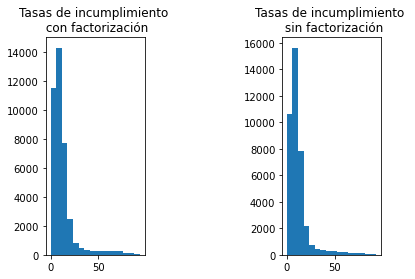

La media para el porcentaje factorizado =  12.235836378243768
La media para el porcentaje sin factorizar =  11.588401428436017
La desviación estándar para el porcentaje factorizado =  13.328800987944156
La desviación estándar para el porcentaje sin factorizar =  11.92280846068495


In [12]:
plt.subplot(1, 3, 1)
plt.hist(final["porcentaje_factor"], bins = 16)
plt.title('Tasas de incumplimiento \n con factorización')
plt.subplot(1, 3, 3)
plt.hist(final["porcentaje_sin_factor"], bins = 16)
plt.title('Tasas de incumplimiento \n sin factorización')
plt.show()
print("La media para el porcentaje factorizado = ", final["porcentaje_factor"].mean())
print("La media para el porcentaje sin factorizar = ",final["porcentaje_sin_factor"].mean())
print("La desviación estándar para el porcentaje factorizado = ", final["porcentaje_factor"].std())
print("La desviación estándar para el porcentaje sin factorizar = ", final["porcentaje_sin_factor"].std())

# Utilizando solamente el porcentaje factorizado, realicemos un diagrama de caja y brazos.
### Como escribimos arriba, varianza es enorme debido a los datos "atipicos", sin embargo, puede que este tipo de comportamientos sean utiles para el modelo.

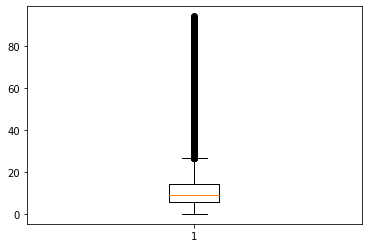

In [13]:
plt.boxplot(final["porcentaje_factor"])
plt.show()

### Juntemos toda la información que tenemos para análizar las variables según los sujetos que hayan superado el umbral de 17% propuesto anteriormente y que esté por debajo.

In [14]:
DF = pd.merge(df_interna,final, left_on=['_id_'],right_on=["num_caso"],how='inner') #
DF = pd.merge(DF,df_externa, on=['_id_'],how='inner')
DF = pd.merge(DF,df_parte1, on=['_id_'],how='inner')
DF = pd.merge(DF,inversion, on=['_id2_'],how='left')
DF = DF.fillna(0)
buenos = DF[DF["porcentaje_factor"]<=17]
malos = DF[DF["porcentaje_factor"]>17]

# Comencemos nuestro análisis con las variables del producto solicitado.
### Componente interno 2.
#### Sin importar el tipo de producto, el 16% de las personas incumple con los pagos.

In [15]:
a = buenos["comp_interno2"].value_counts().reset_index()
a = a.rename(columns={'index':'comp_interno2','comp_interno2':'buenos'})
b = malos["comp_interno2"].value_counts().reset_index()
b = b.rename(columns={'index':'comp_interno2','comp_interno2':'malos'})
c = pd.merge(a,b,on=["comp_interno2"],how='left')
c["buenos"] = c["buenos"]/(c["buenos"]+c["malos"])
c["malos"] = 1-c["buenos"]
c

,comp_interno2,buenos,malos
0,b'1',0.836296,0.163704
1,b'0',0.831036,0.168964


## Con la misma idea de componente interno 2, generaremos un análisis para las otras carateristicas relacionadas con el producto.

In [16]:
def analisis(componente):
    a = buenos[componente].value_counts().reset_index()
    a = a.rename(columns={'index':componente,componente:'buenos'})
    b = malos[componente].value_counts().reset_index()
    b = b.rename(columns={'index':componente,componente:'malos'})
    c = pd.merge(a,b,on=[componente],how='left')
    c["buenos"] = c["buenos"]/(c["buenos"]+c["malos"])
    c["malos"] = 1-c["buenos"]
    print("Categorias de", componente, "encima de 17% =",len(c[c["malos"]>.17]))
    print("Categorias de", componente, "por debajo de 17% =",len(c[c["malos"]<=.17]))

### Componente interno 3.
#### Para las 31 variables, los malos suelen ser menos del 17% con excepción de algunas observaciones. En este caso, el 31 es el que presenta más margen de incumplimiento.

In [17]:
analisis("comp_interno3")

Categorias de comp_interno3 encima de 17% = 17
Categorias de comp_interno3 por debajo de 17% = 15


### Componente interno 4.
#### En este caso encontramos varias observaciones que se encuentran por debajo del 17%, poco más de la mitad.

In [18]:
analisis("comp_interno4")

Categorias de comp_interno4 encima de 17% = 25
Categorias de comp_interno4 por debajo de 17% = 24


### Categoria 1.
#### La mitad de las clasificaciones dentro de categoria 1 cumplen estar por debajo de 17%

In [19]:
analisis("categoria1")

Categorias de categoria1 encima de 17% = 3
Categorias de categoria1 por debajo de 17% = 3


### Categoria 2.

In [20]:
analisis("categoria2")

Categorias de categoria2 encima de 17% = 6
Categorias de categoria2 por debajo de 17% = 7


### Categoria 3.

In [21]:
analisis("categoria3")

Categorias de categoria3 encima de 17% = 17
Categorias de categoria3 por debajo de 17% = 15


# Ahora analicemos las variables de los sujetos en relación a sus incumplimientos

In [22]:
def comp_medidas(DF):
    ci_1 = [DF["comp_interno1"].min(), DF["comp_interno1"].max(), DF["comp_interno1"].mean(), DF["comp_interno1"].median(), DF["comp_interno1"].quantile(0.75)]
    ce_1 = [DF["comp_externo1"].min(), DF["comp_externo1"].max(), DF["comp_externo1"].mean(), DF["comp_externo1"].median(), DF["comp_externo1"].quantile(0.75)]
    ce_2 = [DF["comp_externo2"].min(), DF["comp_externo2"].max(), DF["comp_externo2"].mean(), DF["comp_externo2"].median(), DF["comp_externo2"].quantile(0.75)]
    ce_3 = [DF["comp_externo3"].min(), DF["comp_externo3"].max(), DF["comp_externo3"].mean(), DF["comp_externo3"].median(), DF["comp_externo3"].quantile(0.75)]
    ce_4 = [DF["comp_externo4"].min(), DF["comp_externo4"].max(), DF["comp_externo4"].mean(), DF["comp_externo4"].median(), DF["comp_externo4"].quantile(0.75)]
    cm_1 = [DF["comp_mixto1"].min(), DF["comp_mixto1"].max(), DF["comp_mixto1"].mean(), DF["comp_mixto1"].median(), DF["comp_mixto1"].quantile(0.75)]
    inv = [DF["inversion"].min(), DF["inversion"].max(), DF["inversion"].mean(), DF["inversion"].median(), DF["inversion"].quantile(0.75)]

    datos = [ci_1, ce_1, ce_2, ce_3, ce_4, cm_1, inv]
    columnas=["Min", "Max", "Mean", "Median", "Quantil_75"]
    filas = ["com_int_1", "comp_ext_1", "comp_ext_2", "comp_ext_3", "comp_ext_4", "comp_mixto", "inversion"]

    tabla = pd.DataFrame(datos, columns = columnas, index = filas)
    return(tabla)

comp_medidas(buenos)

,Min,Max,Mean,Median,Quantil_75
com_int_1,0.0,3.294833e+05,1.029972e+03,0.000000,1013.171226
comp_ext_1,-609.0,2.898551e+06,5.715189e+02,234.782609,489.275362
comp_ext_2,-609.0,1.000000e+10,2.772030e+08,24.992818,57.454754
comp_ext_3,-608.0,1.000000e+10,4.533843e+07,95.000000,118.000000
comp_ext_4,-230.0,1.000000e+10,1.764829e+07,-230.000000,-230.000000
comp_mixto,0.2,4.000000e-01,3.377472e-01,0.344540,0.369820
inversion,0.0,9.505240e+04,6.753415e+01,0.000000,9.669154


#### La media no es un buen representante de los datos para algunas variables debido a los pocos valores con mucho peso. Por ejemplo en el componente externo 1 vemos que el maximo es enorme mientras que el 75% de los datos se encuentran por debajo de 489.27.

# Será mejor analizar cada variable por separado.
### En algunos casos tomaremos al logaritmo simplemente para observar el comportamiento más allá de intentar encontrar frecuencias.
### Componente interno 1.
#### Vemos que la variable es continua y el comportamiento del histograma es explicado por la gran cantidad de personas al rededor del cero. Quitaremos los ceros para tomar el logartimo y veremos si hay diferencias en esta variable. 

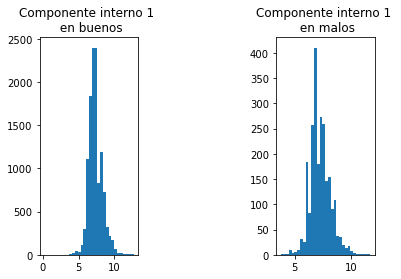

In [23]:
plt.subplot(1, 3, 1)
plt.hist(np.log(buenos[buenos["comp_interno1"]>1]["comp_interno1"]), bins = 32)
plt.title('Componente interno 1 \n en buenos')
plt.subplot(1, 3, 3)
plt.hist(np.log(malos[malos["comp_interno1"]>1]["comp_interno1"]), bins = 32)
plt.title('Componente interno 1 \n en malos')
plt.show()

### Componente externo 2.
#### Solo basta ver los valores mínimos y máximos para comprender la complejidad de la variable. Graficar sería inútil.

In [24]:
buenos[["comp_externo2"]].reset_index().groupby(["comp_externo2"]).agg('count')

,index
comp_externo2,
-6.090000e+02,1
-6.080000e+02,224
-6.070000e+02,2
-6.050000e+02,4
-2.300000e+02,484
...,...
4.029733e+02,1
4.311979e+02,1
4.897156e+02,1


### Componente externo 3.
#### Ocurre lo mismo que en la variable anteriormente descrita.

In [25]:
buenos[["comp_externo3"]].reset_index().groupby(["comp_externo3"]).agg('count')

,index
comp_externo3,
-6.080000e+02,129
-6.010000e+02,2
-2.300000e+02,1855
-2.290000e+02,351
-2.280000e+02,10
...,...
1.470000e+02,1
1.480000e+02,1
1.520000e+02,1


### Componente externo 4.
#### En este caso, dado que solo tenemos 5 tipos de valores, podríamos pensar que en realidad se trata de una variable categorica.

In [26]:
buenos[["comp_externo4"]].reset_index().groupby(["comp_externo4"]).agg('count')

,index
comp_externo4,
-2.300000e+02,26841
-2.290000e+02,2089
-2.280000e+02,11
0.000000e+00,3865
1.000000e+10,58


### Componente mixto.
#### Una vez más, la diferencia entre buenos y malos sigue siendo complicada de descifrar.

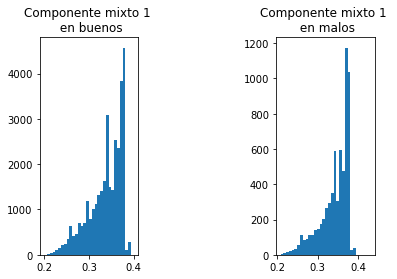

In [27]:
plt.subplot(1, 3, 1)
plt.hist(buenos["comp_mixto1"], bins = 32)
plt.title('Componente mixto 1 \n en buenos')
plt.subplot(1, 3, 3)
plt.hist(malos["comp_mixto1"], bins = 32)
plt.title('Componente mixto 1 \n en malos')
plt.show()

### Inversión.
#### Aparentemente los valores que bajo logaritmo rondan el 4 fueron aceptados. Aún así, esto es decir demasiado, dado que el histograma de rechazados es muy similar pero mas inclinada a la derecha.

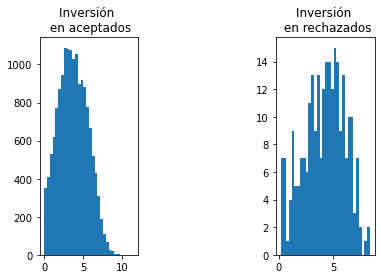

In [28]:
plt.subplot(1, 3, 1)
plt.hist(np.log(aceptados[aceptados["inversion"]>1]["inversion"]), bins = 32)
plt.title('Inversión \n en aceptados')
plt.subplot(1, 3, 3)
plt.hist(np.log(rechazados[rechazados["inversion"]>1]["inversion"]), bins = 32)
plt.title('Inversión \n en rechazados')
plt.show()

# Con la información ya análizada, ordenaremos nuestras variables entre las que representan el producto solicitado y las caracteristicas de nuestro cliente.
## Como se observo en el análisis anterior algunas variables son continuas y otras parecen indicar ser categoricas. Propondremos intervalos para las continuas como propuesta para el modelo.

In [39]:
comp_A = ['comp_interno1', 'comp_externo1', 'comp_externo2', 'comp_externo3', 'comp_externo4', 'comp_mixto1','inversion']
comp_B = ['comp_interno2', 'comp_interno3', 'comp_interno4', 'categoria1', 'categoria2', 'categoria3']

componentes = ["Dar_Credito"]+ comp_A + comp_B 

parametros = DF[componentes]
parametros

,Dar_Credito,comp_interno1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,1,0.000000,260.869565,25.854639,56.0,-230.0,0.33522,0.000000,b'0',11.0,58.0,2.0,9.0,156.0
1,1,0.000000,40.579710,2.872738,62.0,-230.0,0.33334,0.041039,b'1',28.0,45.0,1.0,4.0,173.0
2,1,0.000000,119.000000,-230.000000,0.0,0.0,0.29186,0.000000,b'1',25.0,45.0,1.0,9.0,170.0
3,1,0.000000,349.275362,34.616490,94.0,-230.0,0.29112,0.000000,b'1',14.0,59.0,3.0,3.0,159.0
4,1,2026.342452,276.811594,27.434645,125.0,-230.0,0.27318,77.422135,b'1',1.0,67.0,2.0,9.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39366,1,0.000000,110.144928,9.910945,122.0,-230.0,0.34552,0.000000,b'1',1.0,60.0,2.0,9.0,146.0
39367,1,0.000000,140.579710,13.932778,95.0,-230.0,0.34318,0.000000,b'1',2.0,50.0,2.0,6.0,147.0
39368,1,1215.805471,188.405797,9.652399,114.0,-230.0,0.38000,730.952882,b'1',30.0,70.0,3.0,4.0,175.0
39369,1,0.000000,434.782609,33.323758,124.0,-230.0,0.34000,24.763419,b'1',3.0,58.0,2.0,9.0,148.0


### Veamos de qué manera organizar los diferentes datos para poder facilitarnos el trabajo a la hora de realizar cualquier estimación. Lo que haremos, será observar los valores y posteriormente definir intervalos. Utilizaremos las siguientes funciones.
#### Además, daremos un pequeño resumen de lo que representan nuestros valores para apoyarnos de esto una vez que definamos que modelo de clasificación utilizar.

In [36]:
def conteo_1(parametros, comp):
    c1 = parametros[comp].value_counts().reset_index()
    c1 = c1.rename(columns={comp: 'Conteo', 'index':comp})
    c1_p = parametros[comp].value_counts(normalize=True).reset_index()
    c1_p = c1_p.rename(columns={comp: 'Conteo_P', 'index':comp})
    c = pd.merge(c1, c1_p, on=[comp],how='inner')
    return(c)

In [37]:
def porcentajes_categorias(df, componente, intervalo):
    com_porcentaje = pd.cut(df[componente],bins=intervalo, right=False).reset_index()
    com_porcentaje =com_porcentaje[componente].value_counts(normalize=False)
    com_porcentaje = com_porcentaje.reset_index()
    com_porcentaje = com_porcentaje.rename(columns={'index':'Intervalo'})
    
    com_porcentaje1 = pd.cut(df[componente],bins=intervalo, right=False).reset_index()
    com_porcentaje1 =com_porcentaje1[componente].value_counts(normalize=True)
    com_porcentaje1 = com_porcentaje1.reset_index()
    com_porcentaje1 = com_porcentaje1.rename(columns={'index':'Intervalo',componente:componente+'_p' })
    
    c = pd.merge(com_porcentaje, com_porcentaje1, on=['Intervalo'],how='inner')
    c = c.sort_values("Intervalo")
    return(c)

##### 1. Dar Crédito:
Los valores dentro de esta columna solamente son 0 y 1, donde 0 es si bajo nuestro modelo clasificamos a alguien como un buen pagador, o no, por lo que no habrá ningún cambio.

##### 2. comp_interno1
Sabemos que este dato nos indica la cantidad de inversión, además por la tabla de las medidas vista anteriormente.
Veamos el comportamiento de los datos.

In [33]:
conteo_1(parametros, comp_A[0])

,comp_interno1,Conteo,Conteo_P
0,0.000000,25135,0.638414
1,1013.171226,1591,0.040410
2,1519.756839,1149,0.029184
3,2026.342452,1006,0.025552
4,810.536981,799,0.020294
...,...,...,...
571,2168.186424,1,0.000025
572,852.583587,1,0.000025
573,886.524823,1,0.000025
574,2372.847011,1,0.000025


Podemos ver que hay 576 valores, siedno el más común es el 0, por lo tanto mantendremos este dato intacto y agruparemos los restantes en intervalos.
Por la tabla vista anteriormente de las diferentes medidas, los intervalos propuestos son los siguientes.

In [61]:
i_ci_1 = [0, 0.00001, 1000, 5000, 50000, 330000]

a = porcentajes_categorias(parametros, comp_A[0], i_ci_1)
a

,Intervalo,comp_interno1,comp_interno1_p
0,"[0.0, 1e-05)",25135,0.638414
2,"[1e-05, 1000.0)",4392,0.111554
1,"[1000.0, 5000.0)",8177,0.207691
3,"[5000.0, 50000.0)",1618,0.041096
4,"[50000.0, 330000.0)",49,0.001245


##### 3. comp_externo1
Veamos el comportamiento de los datos

In [42]:
conteo_1(parametros, comp_A[1])

,comp_externo1,Conteo,Conteo_P
0,-609.000000,988,0.025095
1,144.927536,902,0.022910
2,217.391304,667,0.016941
3,289.855072,633,0.016078
4,579.710145,528,0.013411
...,...,...,...
6389,1849.542029,1,0.000025
6390,132.026087,1,0.000025
6391,1843.333333,1,0.000025
6392,322.130435,1,0.000025


De igual forma son demasidos datos, por lo que igual los agruparemos en intervalos.

In [62]:
i_ce_1 = [-700, 0, 250, 500, 3000000]

a = porcentajes_categorias(parametros, comp_A[1], i_ce_1)
a

,Intervalo,comp_externo1,comp_externo1_p
3,"[-700, 0)",1246,0.031648
0,"[0, 250)",19851,0.504204
2,"[250, 500)",8994,0.228442
1,"[500, 3000000)",9280,0.235706


#### 4. comp_externo2
Veamos el comportamiento de los datos

In [46]:
conteo_1(parametros, comp_A[2])

,comp_externo2,Conteo,Conteo_P
0,1.000000e+10,1132,0.028752
1,1.436369e+01,848,0.021539
2,2.154553e+01,637,0.016179
3,-2.300000e+02,604,0.015341
4,2.872738e+01,457,0.011608
...,...,...,...
5977,5.406492e+01,1,0.000025
5978,5.374404e+01,1,0.000025
5979,1.766745e+02,1,0.000025
5980,1.317150e+02,1,0.000025


Al igual que en los casos anteriores, agruparemos en intervalos. Notemos que en esta ocasión, 1.0000e+10 es el valor que más datos tiene, sin embargo, por el análisis hecho anteriormente, la mayoria de los datos se concentra en 57.5.

In [63]:
i_ce_2 = [-700, 0, 25, 60, 875, 999999999, 10000000000]

a = porcentajes_categorias(parametros, comp_A[2], i_ce_1)
a

,Intervalo,comp_externo2,comp_externo2_p
1,"[-700, 0)",1042,0.027250
0,"[0, 250)",37151,0.971547
2,"[250, 500)",42,0.001098
3,"[500, 3000000)",4,0.000105


El penúltimo intervalo solamente es para mostrar que de 875 deja de haber valores hasta 10000000000.

#### 5. comp_externo3
Veamos el comportamiento de los datos.

In [49]:
conteo_1(parametros, comp_A[3])

,comp_externo3,Conteo,Conteo_P
0,-230.0,2205,0.056006
1,0.0,1885,0.047878
2,132.0,882,0.022402
3,128.0,748,0.018999
4,129.0,721,0.018313
...,...,...,...
225,-607.0,1,0.000025
226,148.0,1,0.000025
227,152.0,1,0.000025
228,-61.0,1,0.000025


Procedamos a dividir la información en intervalos. De igual manera, nos apoyaremos de la información obtenida anteriormente.

In [64]:
i_ce_3 = [-700, -300, 0, 160, 999999999, 10000000000]

a = porcentajes_categorias(parametros, comp_A[3], i_ce_3)
a

,Intervalo,comp_externo3,comp_externo3_p
2,"[-700, -300)",175,0.004445
1,"[-300, 0)",3518,0.089355
0,"[0, 160)",35512,0.901984
4,"[160, 999999999)",0,0.000000
3,"[999999999, 10000000000)",166,0.004216


#### 6. comp_externo4.
Veamos el comportamiento de los datos.

In [52]:
conteo_1(parametros, comp_A[4])

,comp_externo4,Conteo,Conteo_P
0,-2.300000e+02,31777,0.807117
1,0.000000e+00,4710,0.119631
2,-2.290000e+02,2798,0.071068
3,1.000000e+10,69,0.001753
4,-2.280000e+02,16,0.000406
5,-2.270000e+02,1,0.000025


Como solamente se cuentan con 6 valores, no es necesario dividirlos en itervalos.

#### 7. comp_mixto1.
Veamos el comportamiento de los datos.

In [53]:
conteo_1(parametros, comp_A[5])

,comp_mixto1,Conteo,Conteo_P
0,0.38000,4131,0.104925
1,0.37000,2682,0.068121
2,0.34000,1754,0.044551
3,0.36000,1165,0.029590
4,0.30000,463,0.011760
...,...,...,...
6576,0.22456,1,0.000025
6577,0.35506,1,0.000025
6578,0.25402,1,0.000025
6579,0.30360,1,0.000025


Se separarán los datos en intervalos.

In [65]:
i_cm_1 = [0.2, 0.24, 0.28, 0.32, 0.36, 0.40, 0.44]

a = porcentajes_categorias(parametros, comp_A[5], i_cm_1)
a

,Intervalo,comp_mixto1,comp_mixto1_p
4,"[0.2, 0.24)",523,0.013284
3,"[0.24, 0.28)",3080,0.078230
2,"[0.28, 0.32)",6828,0.173427
1,"[0.32, 0.36)",13225,0.335907
0,"[0.36, 0.4)",15712,0.399075
5,"[0.4, 0.44)",3,0.000076


#### 8. Inversion
Veamos el comportamiento de los datos.

In [56]:
conteo_1(parametros, comp_A[6])

,inversion,Conteo,Conteo_P
0,0.000000,25313,0.642935
1,0.000012,14,0.000356
2,0.000023,12,0.000305
3,0.000035,7,0.000178
4,0.001167,6,0.000152
...,...,...,...
13948,2.190012,1,0.000025
13949,10.769802,1,0.000025
13950,41.920338,1,0.000025
13951,57.340245,1,0.000025


Dividiremos en intervalos, separando el 0 del resto de los datos.

In [66]:
i_inv = [0, 0.0001, 10, 100, 95100]

a = porcentajes_categorias(parametros, comp_A[6], i_inv)
a

,Intervalo,inversion,inversion_p
0,"[0.0, 0.0001)",25361,0.644154
2,"[0.0001, 10.0)",4543,0.115389
1,"[10.0, 100.0)",5491,0.139468
3,"[100.0, 95100.0)",3976,0.100988


### Para las demás columnas, notemos que hay pocos datos repetidos, por tanto tampoco es necesario relaizar intervalos.

In [59]:
tamanio = []
for k in comp_B:
    nuevo = DF.groupby([k]).agg({k: "count"})
    tamanio.append(len(nuevo))
tamanio

[2, 32, 55, 6, 13, 32]

## Para resumir, listemos la tabla para que se muestren los intervalos correspondientes.

In [67]:
comp_C = ['comp_interno1', 'comp_externo1', 'comp_externo2', 'comp_externo3', 'comp_mixto1','inversion']
intervalos = [i_ci_1, i_ce_1, i_ce_2, i_ce_3, i_cm_1, i_inv]
parametros_2= parametros.copy(deep=True)

for k in range(len(comp_C)):
    parametros_2[comp_C[k]] = pd.cut(parametros_2[comp_C[k]],bins=intervalos[k], right=False)
parametros_2

,Dar_Credito,comp_interno1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,comp_mixto1,inversion,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,1,"[0.0, 1e-05)","[250, 500)","[25, 60)","[0, 160)",-230.0,"[0.32, 0.36)","[0.0, 0.0001)",b'0',11.0,58.0,2.0,9.0,156.0
1,1,"[0.0, 1e-05)","[0, 250)","[0, 25)","[0, 160)",-230.0,"[0.32, 0.36)","[0.0001, 10.0)",b'1',28.0,45.0,1.0,4.0,173.0
2,1,"[0.0, 1e-05)","[0, 250)","[-700, 0)","[0, 160)",0.0,"[0.28, 0.32)","[0.0, 0.0001)",b'1',25.0,45.0,1.0,9.0,170.0
3,1,"[0.0, 1e-05)","[250, 500)","[25, 60)","[0, 160)",-230.0,"[0.28, 0.32)","[0.0, 0.0001)",b'1',14.0,59.0,3.0,3.0,159.0
4,1,"[1000.0, 5000.0)","[250, 500)","[25, 60)","[0, 160)",-230.0,"[0.24, 0.28)","[10.0, 100.0)",b'1',1.0,67.0,2.0,9.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39366,1,"[0.0, 1e-05)","[0, 250)","[0, 25)","[0, 160)",-230.0,"[0.32, 0.36)","[0.0, 0.0001)",b'1',1.0,60.0,2.0,9.0,146.0
39367,1,"[0.0, 1e-05)","[0, 250)","[0, 25)","[0, 160)",-230.0,"[0.32, 0.36)","[0.0, 0.0001)",b'1',2.0,50.0,2.0,6.0,147.0
39368,1,"[1000.0, 5000.0)","[0, 250)","[0, 25)","[0, 160)",-230.0,"[0.36, 0.4)","[100.0, 95100.0)",b'1',30.0,70.0,3.0,4.0,175.0
39369,1,"[0.0, 1e-05)","[250, 500)","[25, 60)","[0, 160)",-230.0,"[0.32, 0.36)","[10.0, 100.0)",b'1',3.0,58.0,2.0,9.0,148.0
